Define target state using a binary number, up to 5-digits:11110


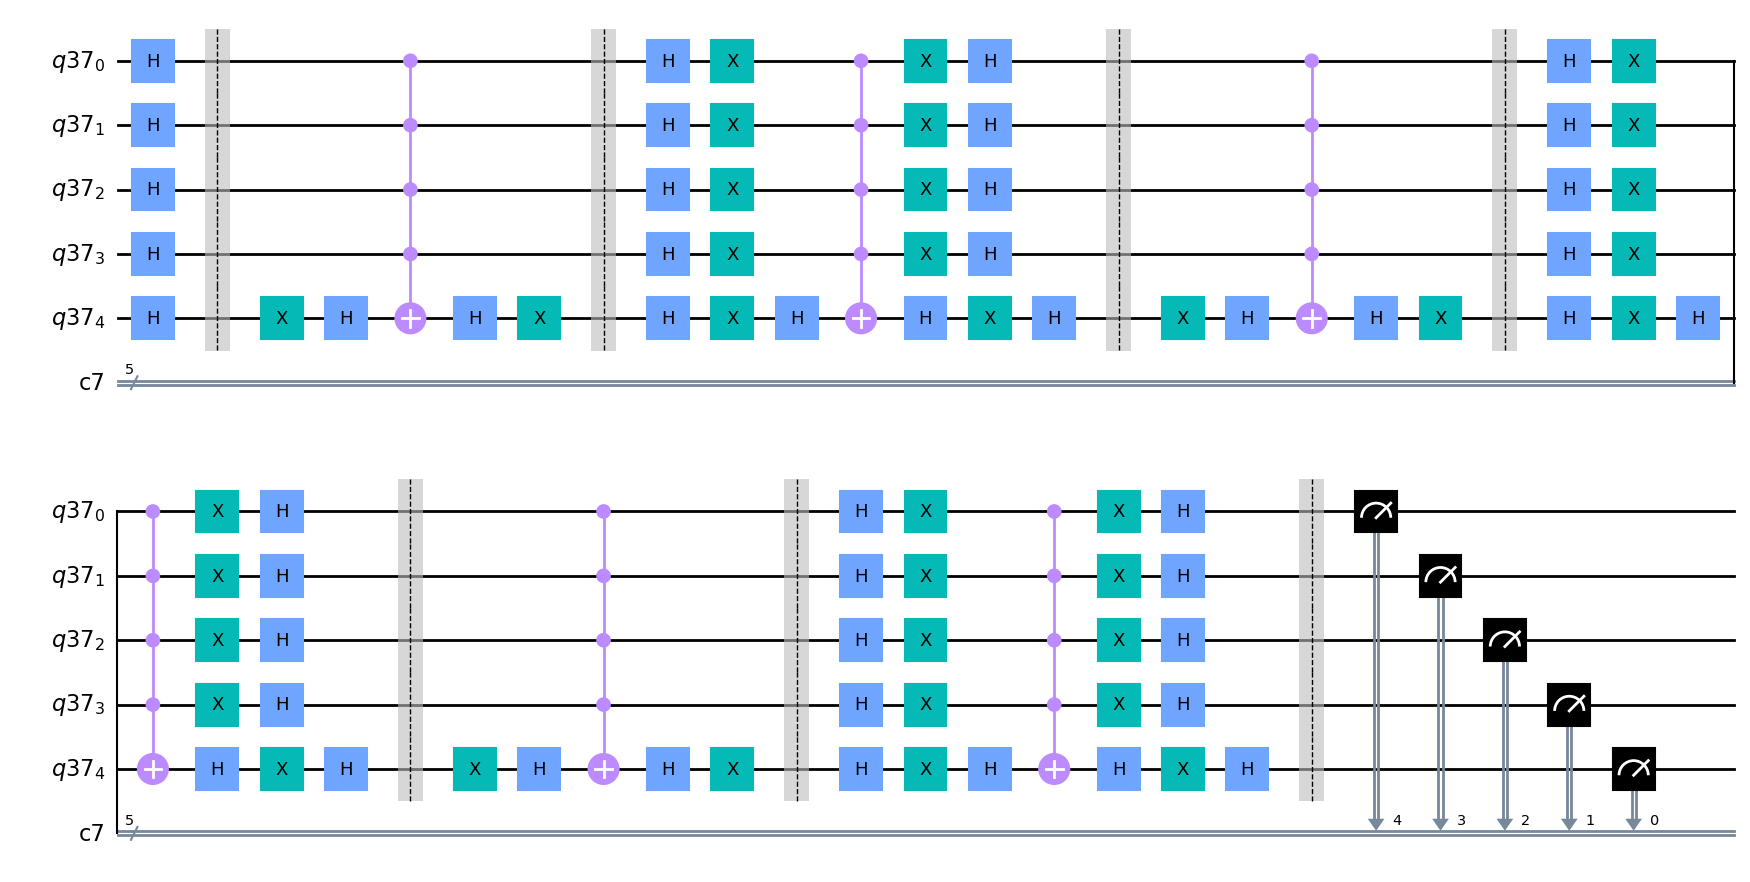

In [14]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
pi = np.pi

#Input target state
while(1):
    target = input("Define target state using a binary number, up to 5-digits:")
    flag = 0
    if len(target)>5:
        flag=1
    else:
        for c in target:
            if not (c=='0' or c=='1'):
                flag=1
                break
    if flag==1:
        print("The input is not a binary number, up to 5-digits.")
    else:
        break

# Define the quantum circuit with n qubits and n classical bits
n = len(target)
qreg = QuantumRegister(n)
creg = ClassicalRegister(n)
qc = QuantumCircuit(qreg, creg)
oracle = qc

# Apply Hadamard gates
for q in range(n):
    qc.h(qreg[q])
        
# Make a list of the first n-1 qubits to be used in a mct gate
input_qubits = []
for q in range(n-1):
    input_qubits.append(qreg[q])
    
qc.barrier()

#Perform O-G operations for multiple times
iterations = round((pi/4)*((2**4)**0.5)-0.5)
for i in range(iterations):
        
    # Apply the oracle
    for i in range(len(target)):
        if target[i]=='0':
            qc.x(qreg[i])
    qc.h(qreg[n-1])
    qc.mct(input_qubits, qreg[n-1])
    qc.h(qreg[n-1])
    for i in range(len(target)):
        if target[i]=='0':
            qc.x(qreg[i])
    qc.barrier()

    # Apply the diffusion operator
    for q in range(n):
        qc.h(qreg[q])
        qc.x(qreg[q])
    qc.h(qreg[q])
    qc.mct(input_qubits, qreg[n-1])
    qc.h(qreg[q])
    for q in range(n):
        qc.x(qreg[q])
        qc.h(qreg[q])
    qc.barrier()

# Measure the qubits and store the result in classical bits
for q in range(n):
    qc.measure(qreg[q], creg[n-1-q])

# Draw the circuit
qc.draw(output='mpl')

11110


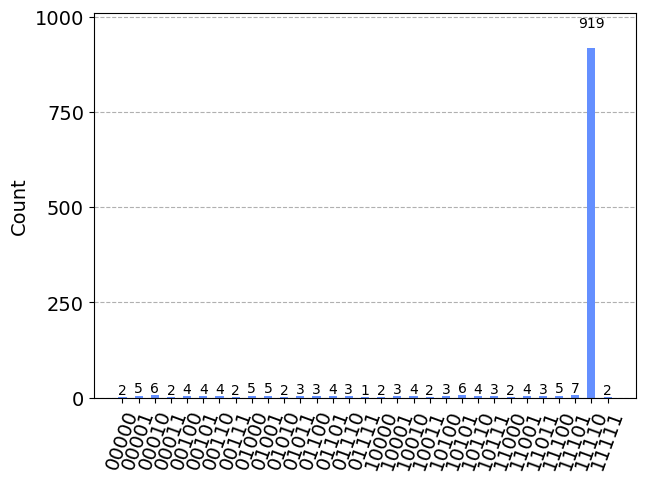

In [15]:
# Simulate the circuit and get the counts
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print(max(counts, key = lambda x: counts[x]))
plot_histogram(counts)

In [17]:
#For running on IBM
%run ibm_connection.py

#save_account() #Uncomment if IBM account is not already saved
backend = "ibmq_qasm_simulator"
backend = "ibmq_lima" #Uncomment to run on ibmq_lima
counts = run(qc, backend)
print(counts)

Job Status: job has successfully run


{'000': 232,
 '001': 222,
 '010': 467,
 '011': 322,
 '100': 195,
 '101': 165,
 '110': 269,
 '111': 176}